## Single Matrix Models

Okay, a little note about what we're doing here. First, get our imports set up:

In [1]:
import sys; sys.path.insert(0, '..')
import catenary.single as m
import jax.numpy.linalg as la
import numpy as np

import uv.reporter.store as rs
import uv.types as t

from uv.fs.reader import FSReader
from uv.fs.reporter import FSReporter


from functools import partial

Set up options for array printing...

In [2]:
 large_width = 400
 np.set_printoptions(linewidth=large_width)

In [61]:
reader = FSReader("output/repl")

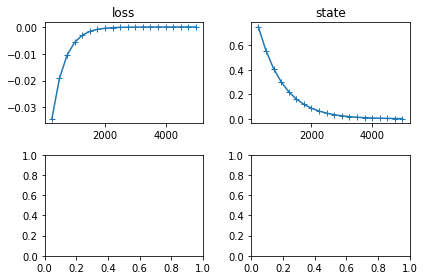

In [63]:
data=reader.read_all(["loss", "state"])
m.plot_metrics(data, 2, 2)

In [34]:
def pivot(xs):
    return np.array([[m["step"], m["value"]] for m in xs]).T

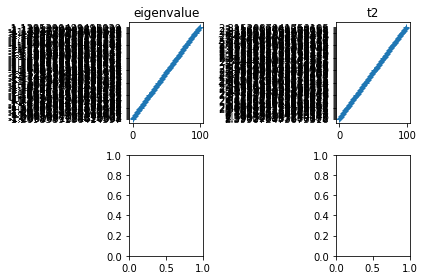

In [63]:

from matplotlib import pyplot as plt
m.plot_metrics(data, 2, 2)

Here's a list of the first 9 0-indexed correlators, with alpha=1.

In [8]:
m.single_matrix_correlators(9, 1, 1.2, 0, 2.5)

DeviceArray([ 1.        ,  0.        ,  2.5       ,  0.        , -1.25      ,  0.        ,  5.20833333,  0.        , -1.21527778], dtype=float64)

Then the 8x8 inner product matrix:

In [10]:
m.inner_product_matrix(8, 1, 1.2, 0, 2.5)

DeviceArray([[  1.        ,   0.        ,   2.5       ,   0.        ,  -1.25      ,   0.        ,   5.20833333,   0.        ],
             [  0.        ,   2.5       ,   0.        ,  -1.25      ,   0.        ,   5.20833333,   0.        ,  -1.21527778],
             [  2.5       ,   0.        ,  -1.25      ,   0.        ,   5.20833333,   0.        ,  -1.21527778,   0.        ],
             [  0.        ,  -1.25      ,   0.        ,   5.20833333,   0.        ,  -1.21527778,   0.        ,   4.4849537 ],
             [ -1.25      ,   0.        ,   5.20833333,   0.        ,  -1.21527778,   0.        ,   4.4849537 ,   0.        ],
             [  0.        ,   5.20833333,   0.        ,  -1.21527778,   0.        ,   4.4849537 ,   0.        ,  17.24054784],
             [  5.20833333,   0.        ,  -1.21527778,   0.        ,   4.4849537 ,   0.        ,  17.24054784,   0.        ],
             [  0.        ,  -1.21527778,   0.        ,   4.4849537 ,   0.        ,  17.24054784,   0.        ,

We can generate big matrices pretty fast:

In [11]:
%time m.inner_product_matrix(100000, 1, 1.2, 0, 2.5).shape

CPU times: user 310 ms, sys: 14.7 ms, total: 324 ms
Wall time: 307 ms


(100000, 100000)

In [ ]:
m.inner_product_matrix(100, 1, 1.2, 0, 2.5)[-1, -1]

In [13]:
ipm = m.inner_product_matrix(10, 1, 1.2, 0, 2.5)

In [14]:
m.min_eigenvalue(10, 1, 1.2, 0, 2.5)

DeviceArray(-142.74398142, dtype=float64)

In [19]:
la.eigvalsh(ipm)

DeviceArray([-1.42743981e+02, -1.09187267e+01, -1.14718876e-01,  6.24100816e-01,  8.92551397e-01,  1.27393352e+00,  1.29144914e+01,  1.63974871e+01,  5.53276153e+01,  1.00701751e+02], dtype=float64)